## LABORATORIO 4

Grupo # 7
Jose Miguel Gonzalez y Gonzalez - 20335

___

## TASK 1

Primero vamos a importar las librerias que vamos a utilizar para el laboratorio general.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import random as rd

TASK 1.1

Leer el archivo CSV proporcionado (kc_house_data.csv dentro de lab4_dataset.zip) y almacenarlo en un p.array para
ser trabajado en el notebook.

utilizamos pandas para poder leer el csv y luego lo pasamos a un numpy array en la variable de data y usarla.

In [11]:
csvData = pd.read_csv('kc_house_data.csv')

data = csvData.to_numpy()
print(data)

[[7129300520 '20141013T000000' 221900.0 ... -122.257 1340 5650]
 [6414100192 '20141209T000000' 538000.0 ... -122.319 1690 7639]
 [5631500400 '20150225T000000' 180000.0 ... -122.233 2720 8062]
 ...
 [1523300141 '20140623T000000' 402101.0 ... -122.299 1020 2007]
 [291310100 '20150116T000000' 400000.0 ... -122.069 1410 1287]
 [1523300157 '20141015T000000' 325000.0 ... -122.299 1020 1357]]


Task 1.2

Ajustar un modelo polinomial (regresión lineal) en base al juego de datos cargado de forma matricial que relaciona
las variables de precio con los pies cuadrados del espacio habitable interior de los apartamentos (price - sqft living)

Generamos la data tomando los datos del csvData, y pasamos los datos a un numpy array, y estos los usamos con la funcion de scatter que nos crea la siguiente tabla ahora generemos la linea de regresion linea. Esto lo haremos atravez de matrizes.

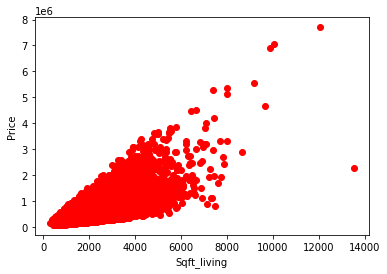

In [12]:
price = csvData["price"]
sqft_living = csvData["sqft_living"]

y = price.to_numpy()
x = sqft_living.to_numpy()

plt.ylabel("Price")
plt.xlabel("Sqft_living")
plt.scatter(x, y, color="red")

Creamos las matrizes que necesitamos para tratar el precio y el Sqft_living haciendo uso de numpy. Vamos a especificar el grado que vamos a utilizar. Luego de eso vamos a usar estas matrices, y vamos a pasar el rango de living. usando linspace, poniendo un maximo y un minimo con el array de x que sacamos antes y la predicion del precio usando array, usando los pesos aprendidos y los rangos.

In [13]:
grad = 1
lenght = len(x)

livingMatrix = np.array(
        [[x[i] ** j 
            for j in range(0, grad+1)] 
                for i in range(lenght)
        ]
    )
lilangLiving = np.linalg.inv(livingMatrix.T @ livingMatrix) @ livingMatrix.T @ y

livingRange = np.linspace(np.min(x), np.max(x), 100)

pricePrediction = np.array([lilangLiving @ np.array([livingRange[i] ** j for j in range(0, grad+1)]) for i in range(100)])

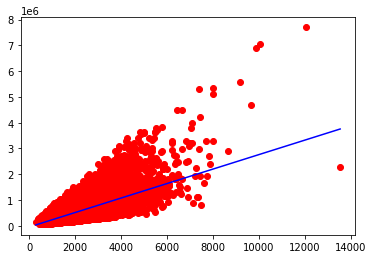

In [14]:
plt.scatter(x, y, color="red")
plt.plot(livingRange, pricePrediction, color="blue")
plt.show()

Task 1.3

Utilice la implementación vectorial del algoritmo de regresión lineal (descenso del gradiente visto en clase

In [15]:
random1 = rd.random()
random2 = rd.random()
livingRange = np.array([[random1], [random2]])

learning_rate = 0.000000001
num_iter = 10000

for i in range(10000):
    y_pred = livingMatrix.dot(livingRange)
    error = y_pred - pricePrediction
    loss = (1/lenght) * livingMatrix.T.dot(error)
    livingRange = livingRange - (0.000000001 * loss)

print("Pesos:", livingRange)

KeyboardInterrupt: 